Shopping Mall sales prediction
--
___
Predicting Shopping Mall Sales. You will have to create a model to predict revenue. Identify the model with the best params. Target Column - Revenue.

___
Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_regression,SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, color_codes= False, rc= None)

In [16]:
path = '/content/drive/MyDrive/Edyoda Round 2'

df = pd.read_csv(path +'/Shopping_Revenue.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [17]:
df.shape

(137, 43)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [19]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

### Statistical analysis

In [20]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


### Data Preprocessing

In [21]:
# Let's check for null values
df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

Two columns with 4 null values are present.

In [22]:
# Let's checkout the columns with null values
print(df['P6'].value_counts(dropna=False),'\n\n',df['P7'].value_counts(dropna=False))

2.0     55
3.0     23
4.0     14
5.0     14
1.0     11
8.0      7
6.0      5
10.0     4
NaN      4
Name: P6, dtype: int64 

 5.0     96
10.0    21
1.0     11
NaN      4
4.0      3
3.0      1
2.0      1
Name: P7, dtype: int64


As both columns are categorical we are gonna fill them with mode.

In [23]:
df['P6'].fillna(df['P6'].mode()[0],inplace = True)
df['P7'].fillna(df['P7'].mode()[0],inplace = True)

In [24]:
# Let's check for null values one last time
df.isna().sum().sum()

0

In [25]:
# let's check for unique values in each column
cols = df.columns
for i in cols:
    print(df[i].value_counts(),'\n')

0      1
94     1
88     1
89     1
90     1
      ..
40     1
39     1
38     1
37     1
136    1
Name: Id, Length: 137, dtype: int64 

2010-02-23    2
2000-01-07    2
2012-02-02    2
1999-07-17    1
2007-06-20    1
             ..
2009-06-01    1
2011-02-09    1
2009-03-28    1
2011-01-18    1
2009-09-01    1
Name: Open Date, Length: 134, dtype: int64 

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ      

Most of the columns contains categorical data here.

There are 2 columns 'ID' and 'Open Date' which contain almost every unique valuues, which won't be of any use to us. So, Let's eliminate them first.

In [26]:
df.drop(['Id','Open Date'],axis = 1, inplace = True)

In [27]:
# Converting datatypes
df = df.convert_dtypes()

In [28]:
# Let's check for duplicate entries
df.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='count', ylabel='City'>

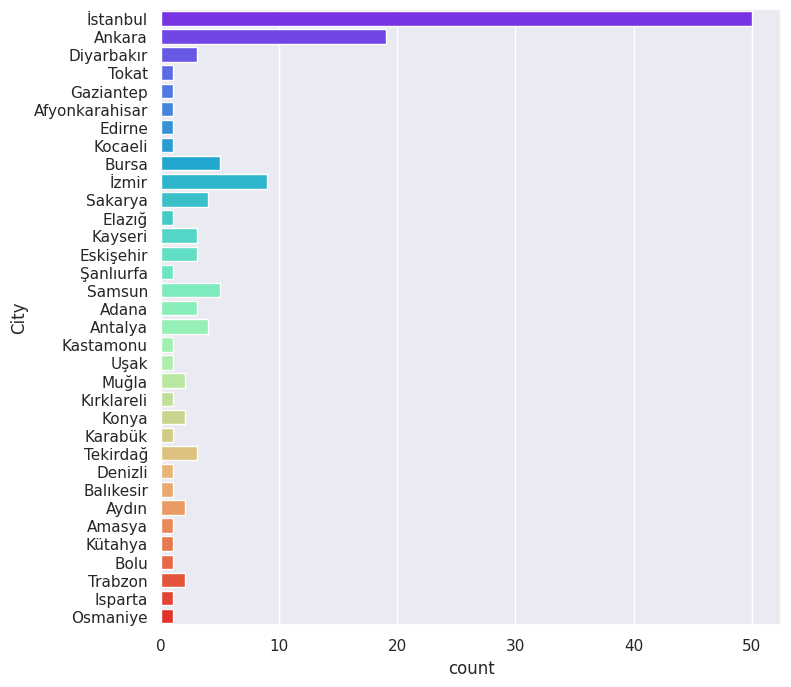

In [29]:
plt.figure(figsize= (8,8))
sns.countplot(data = df, y = 'City',palette = 'rainbow')

We are getting maximum customers from __Istanbul__ and after that __Ankara__.

There are many cities from which we are getting very low amount of customers. we should focus on finding the reason of it.

<Axes: xlabel='City Group', ylabel='count'>

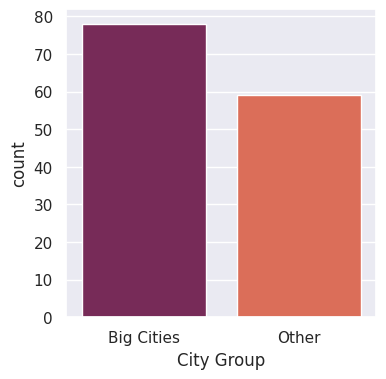

In [30]:
plt.figure(figsize= (4,4))
sns.countplot(data = df, x = 'City Group',palette = 'rocket')

We are having more customers from ___Big Cities___ compare to other cities.

<Axes: xlabel='Type', ylabel='count'>

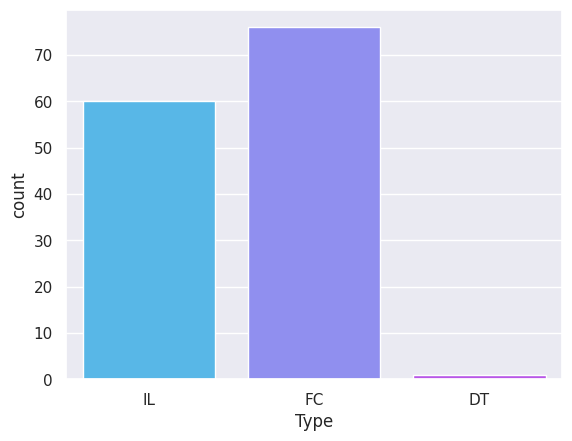

In [31]:
# plt.figure(figsize= (8,8))
sns.countplot(data = df, x = 'Type',palette = 'cool')

We are having more customers in ___FC___ Type.

___DT___ is having low no of customers. we should be focusing on the reason behind it.

<Axes: xlabel='revenue', ylabel='Density'>

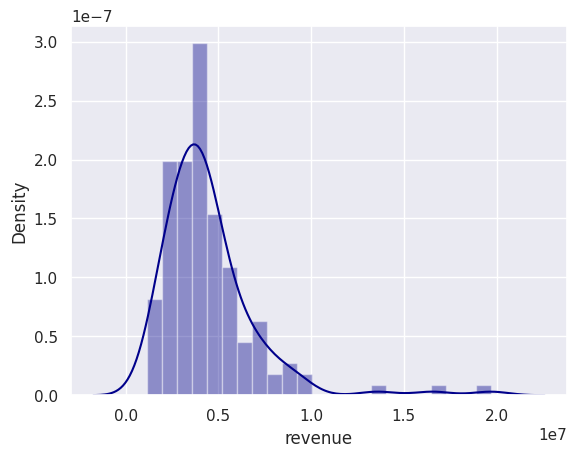

In [32]:
sns.distplot(df['revenue'],kde = True, color = 'darkblue')

Data in target column is slighlty skewed to the right.

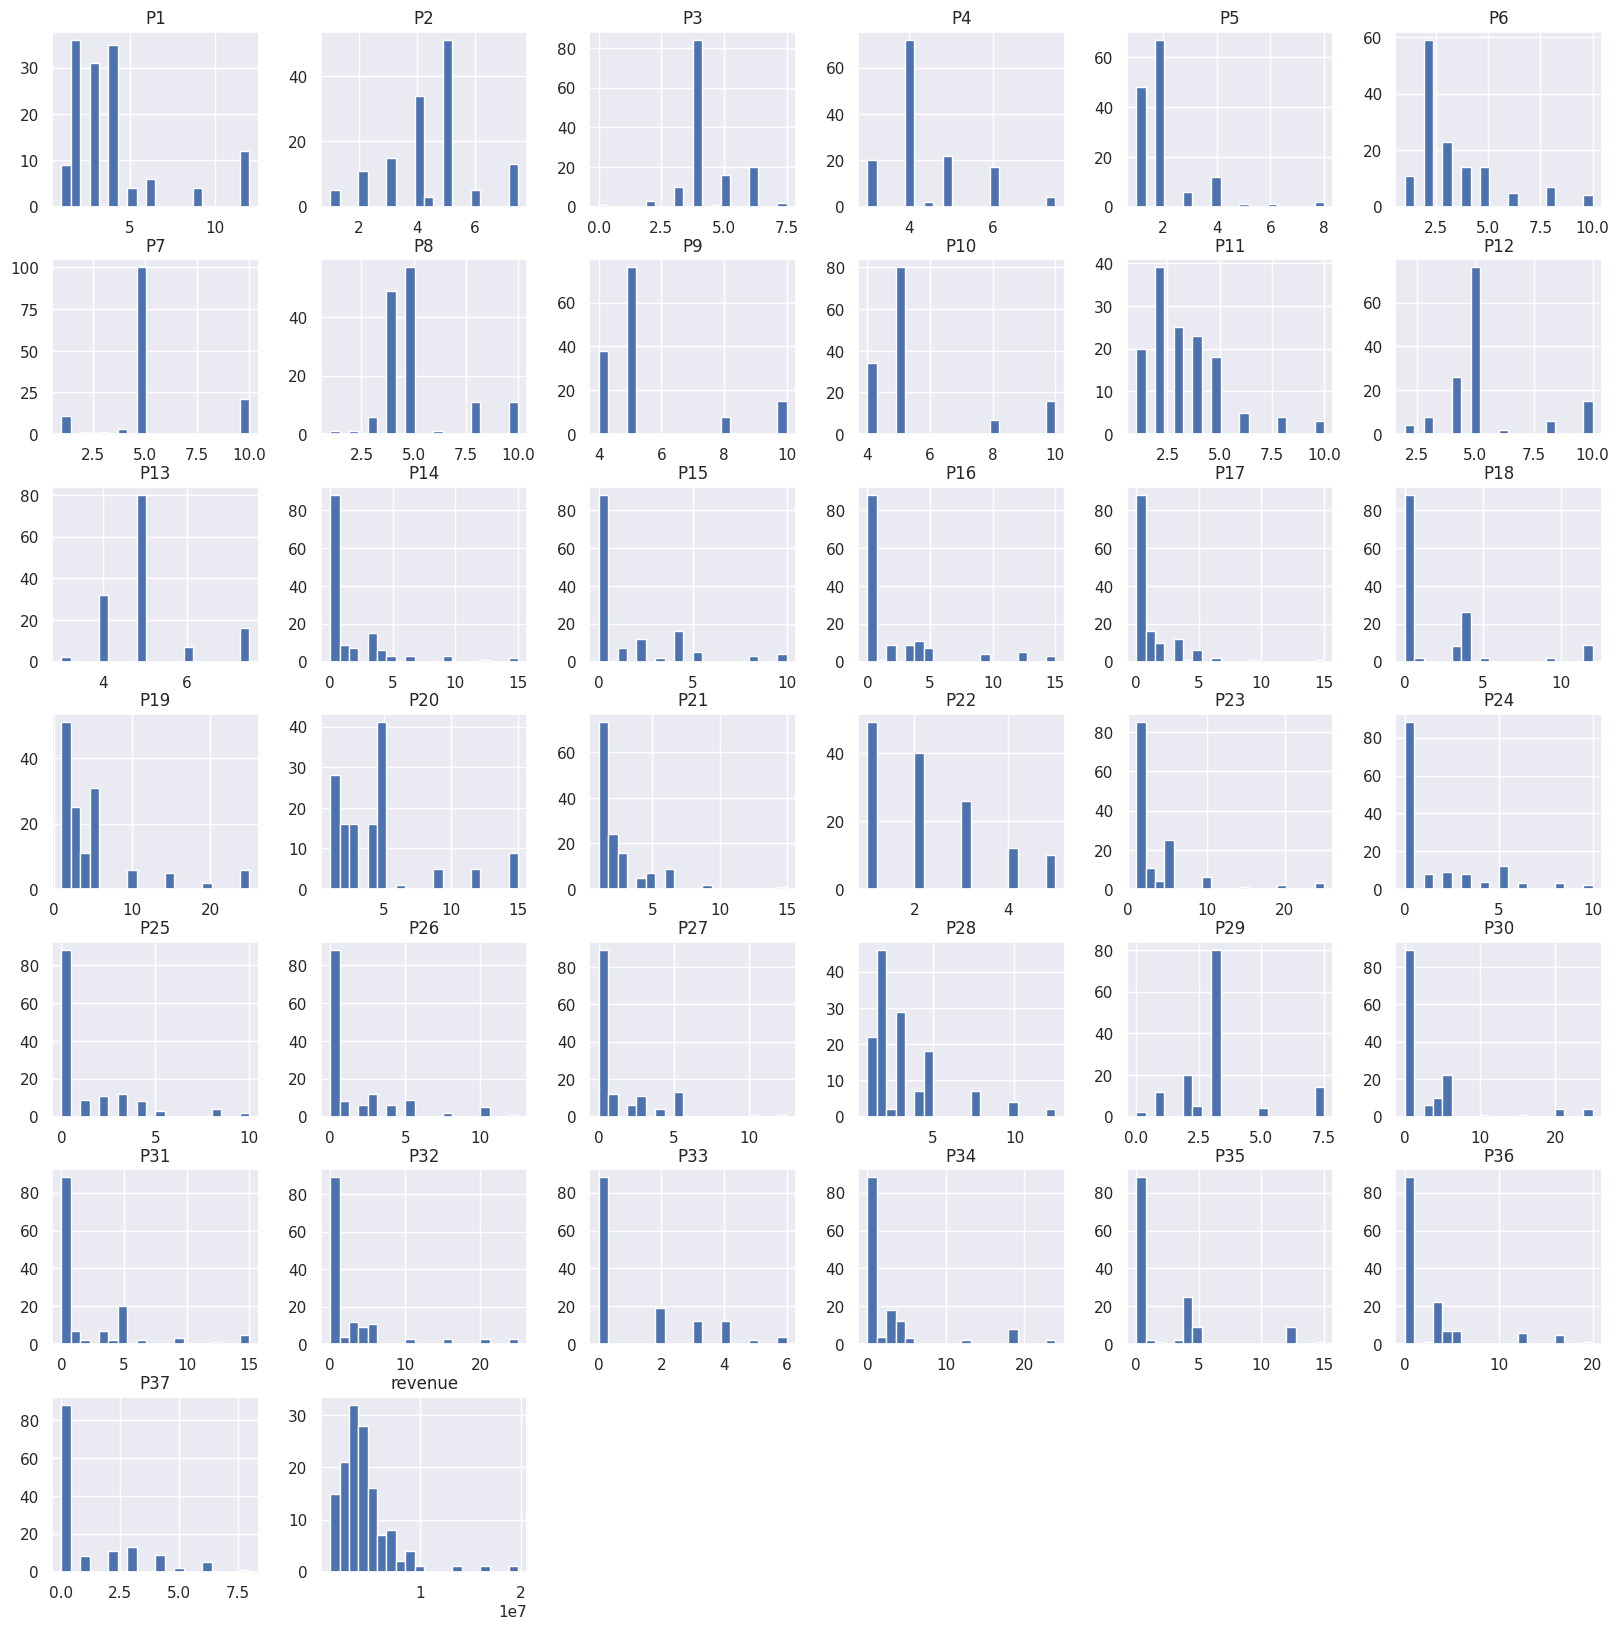

In [33]:
# Distrubution of numeric data

df.hist(bins = 20,figsize = (20,20))
plt.show()

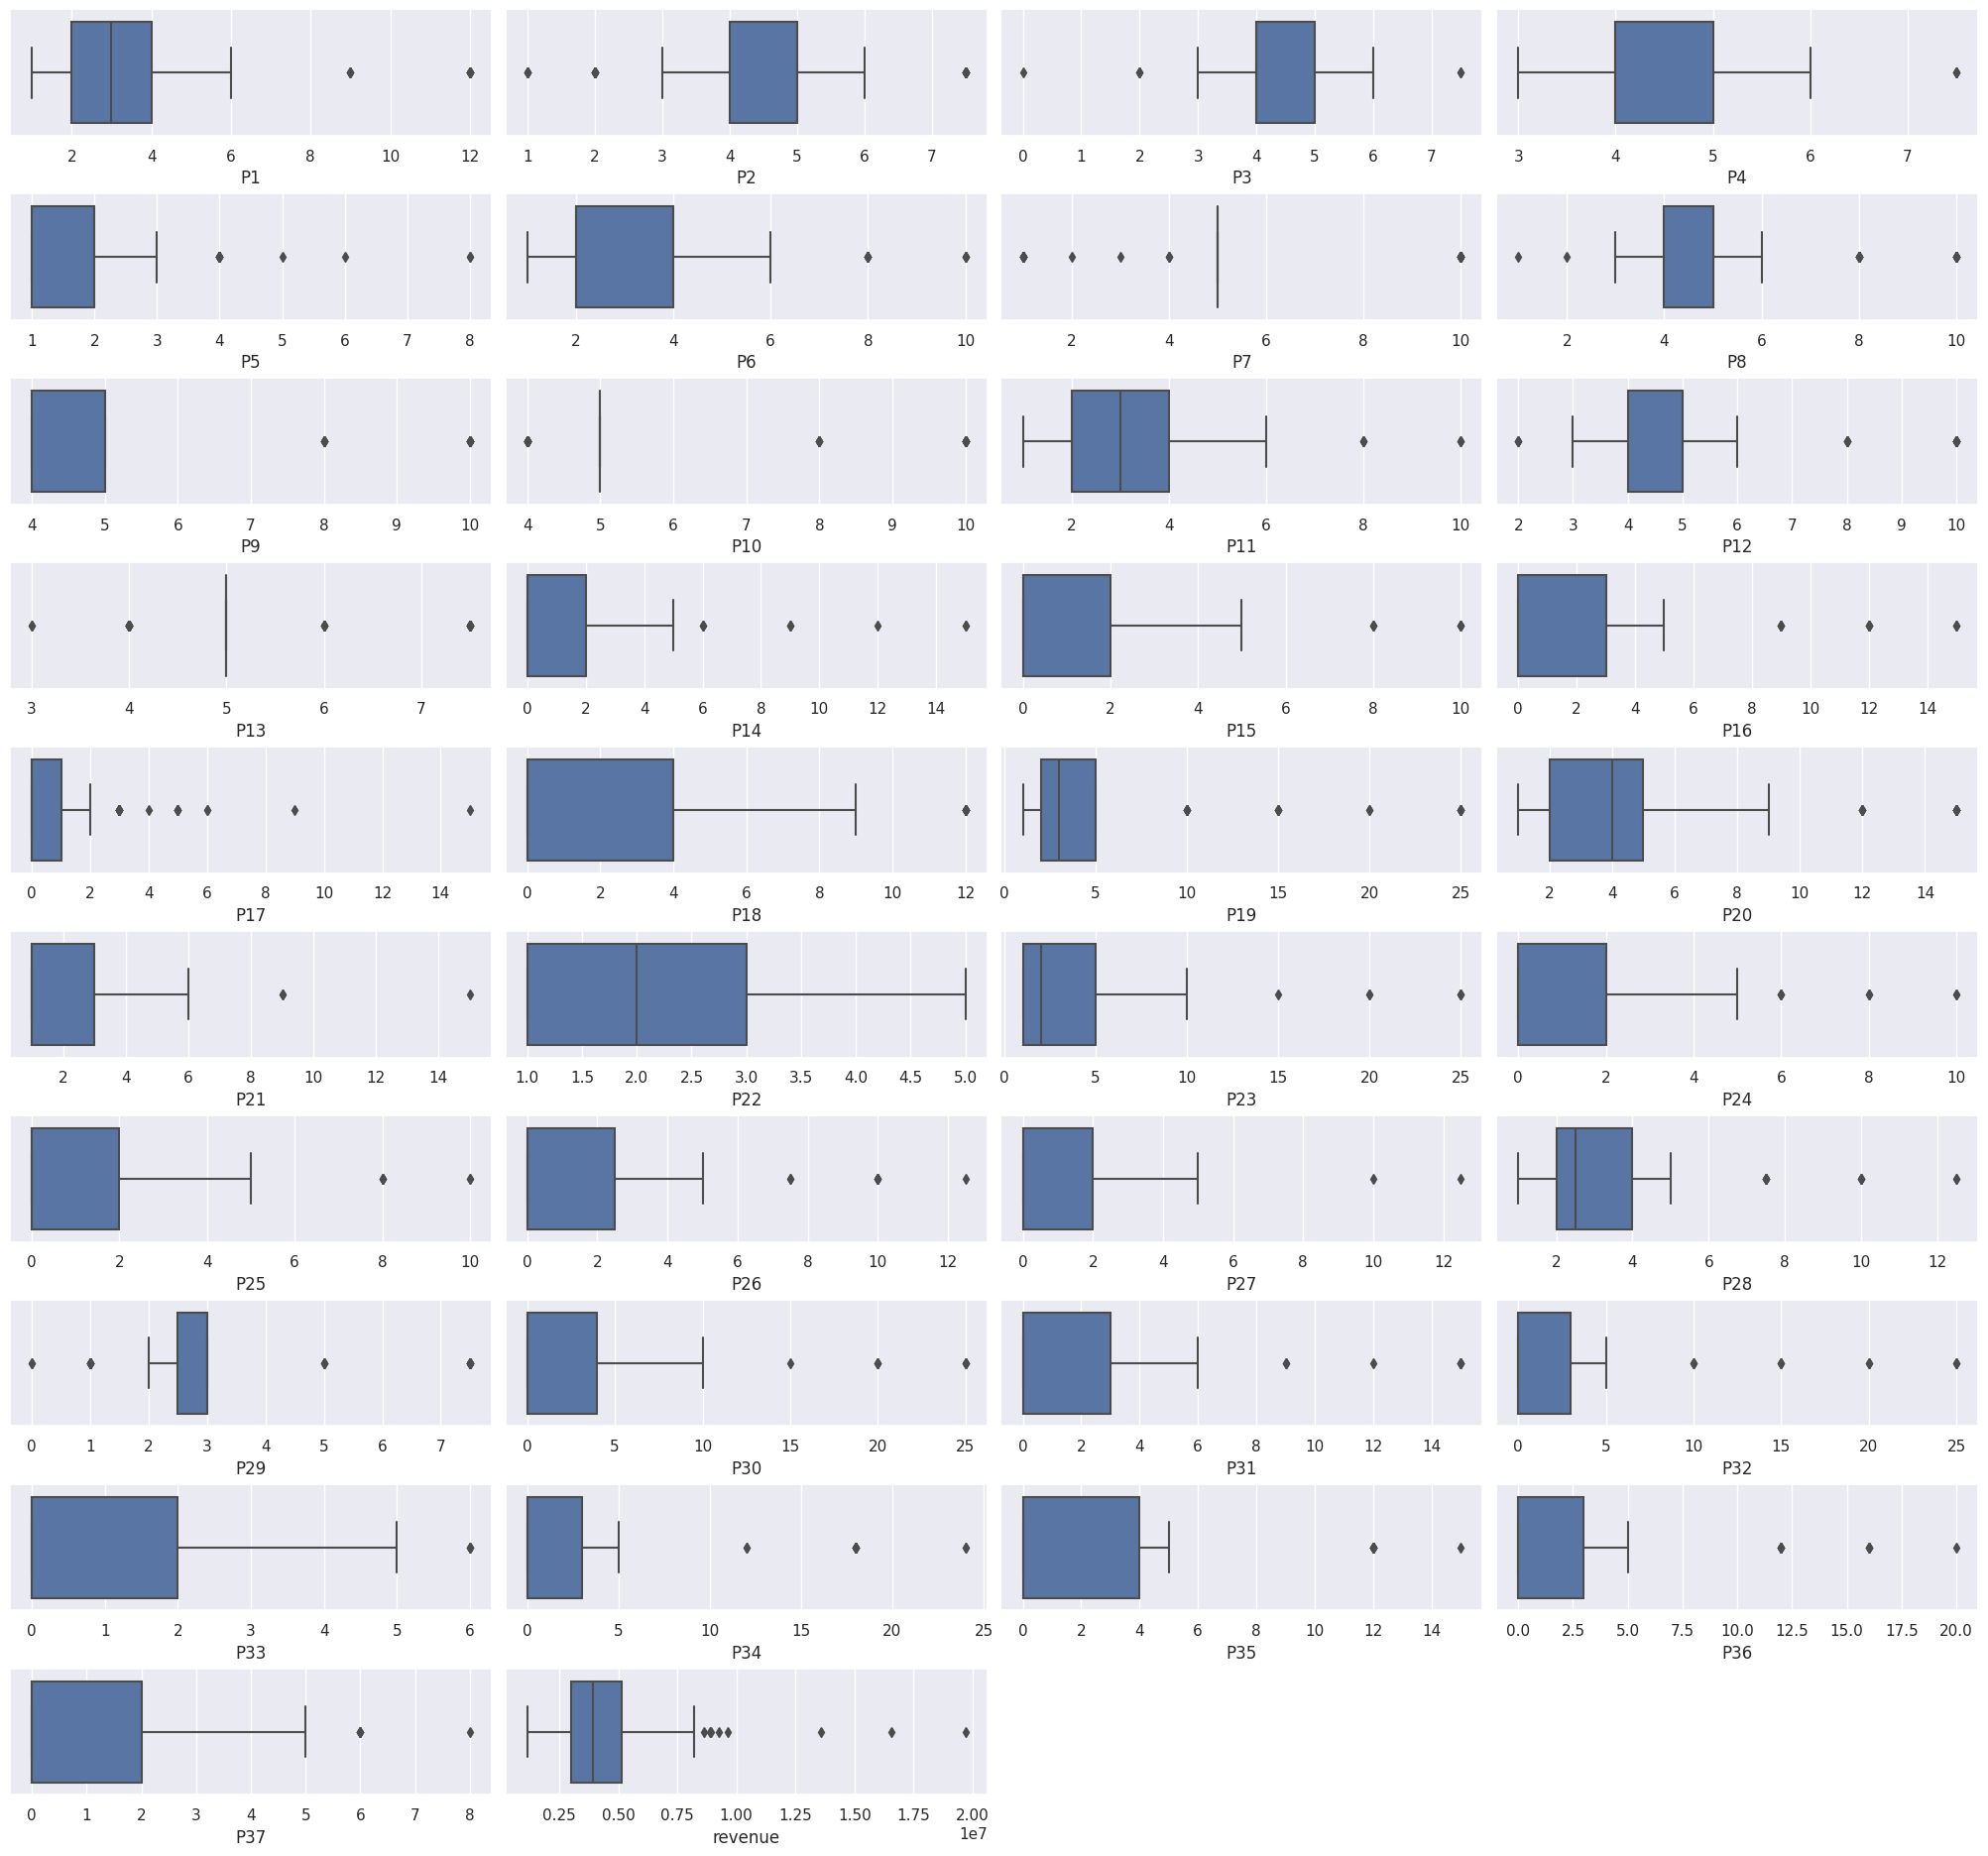

In [34]:
plt.figure(figsize=(20, 20))
cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_plots = len(cols)
rows = 11
cols_per_row = num_plots // rows + 1

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])

plt.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)
plt.show()

### Bivariate Analysis

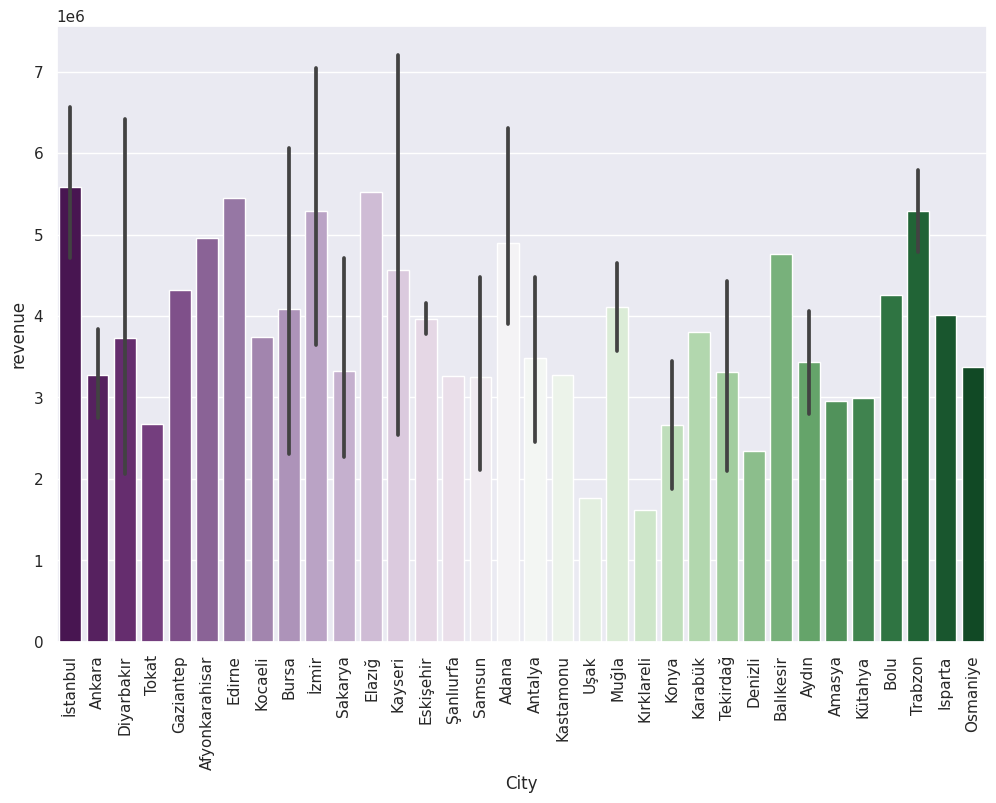

In [35]:
plt.figure(figsize= (12,8))
sns.barplot(data = df, y = 'revenue',x = 'City',palette = 'PRGn')
plt.xticks(rotation = 90)
plt.show()

We are getting maximum amount of sales from __Istanbul__, __Edirne__ and __Elazığ__.

<Axes: xlabel='City Group', ylabel='revenue'>

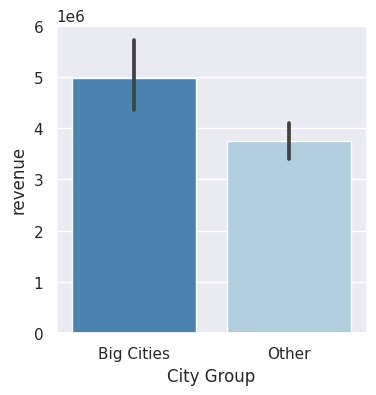

In [36]:
plt.figure(figsize= (4,4))
sns.barplot(data = df, y = 'revenue',x = 'City Group',palette = 'Blues_r')

We are getting higher amount of sales from ___Big Cities___.

<Axes: xlabel='Type', ylabel='revenue'>

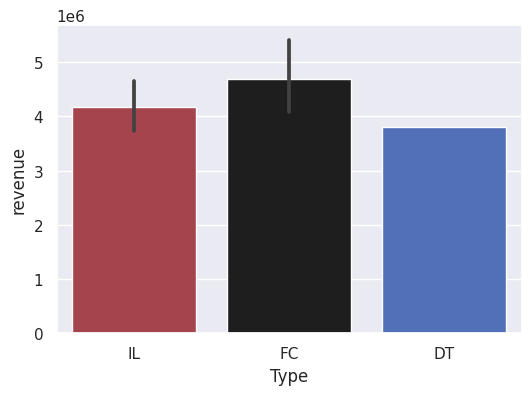

In [37]:
plt.figure(figsize= (6,4))
sns.barplot(data = df, y = 'revenue',x = 'Type',palette = 'icefire_r')

We are getting maximum amount of sales from ___Fc___ Type then ___IL___ and lastly ___DT___.

### Multivariate Analysis

<Axes: >

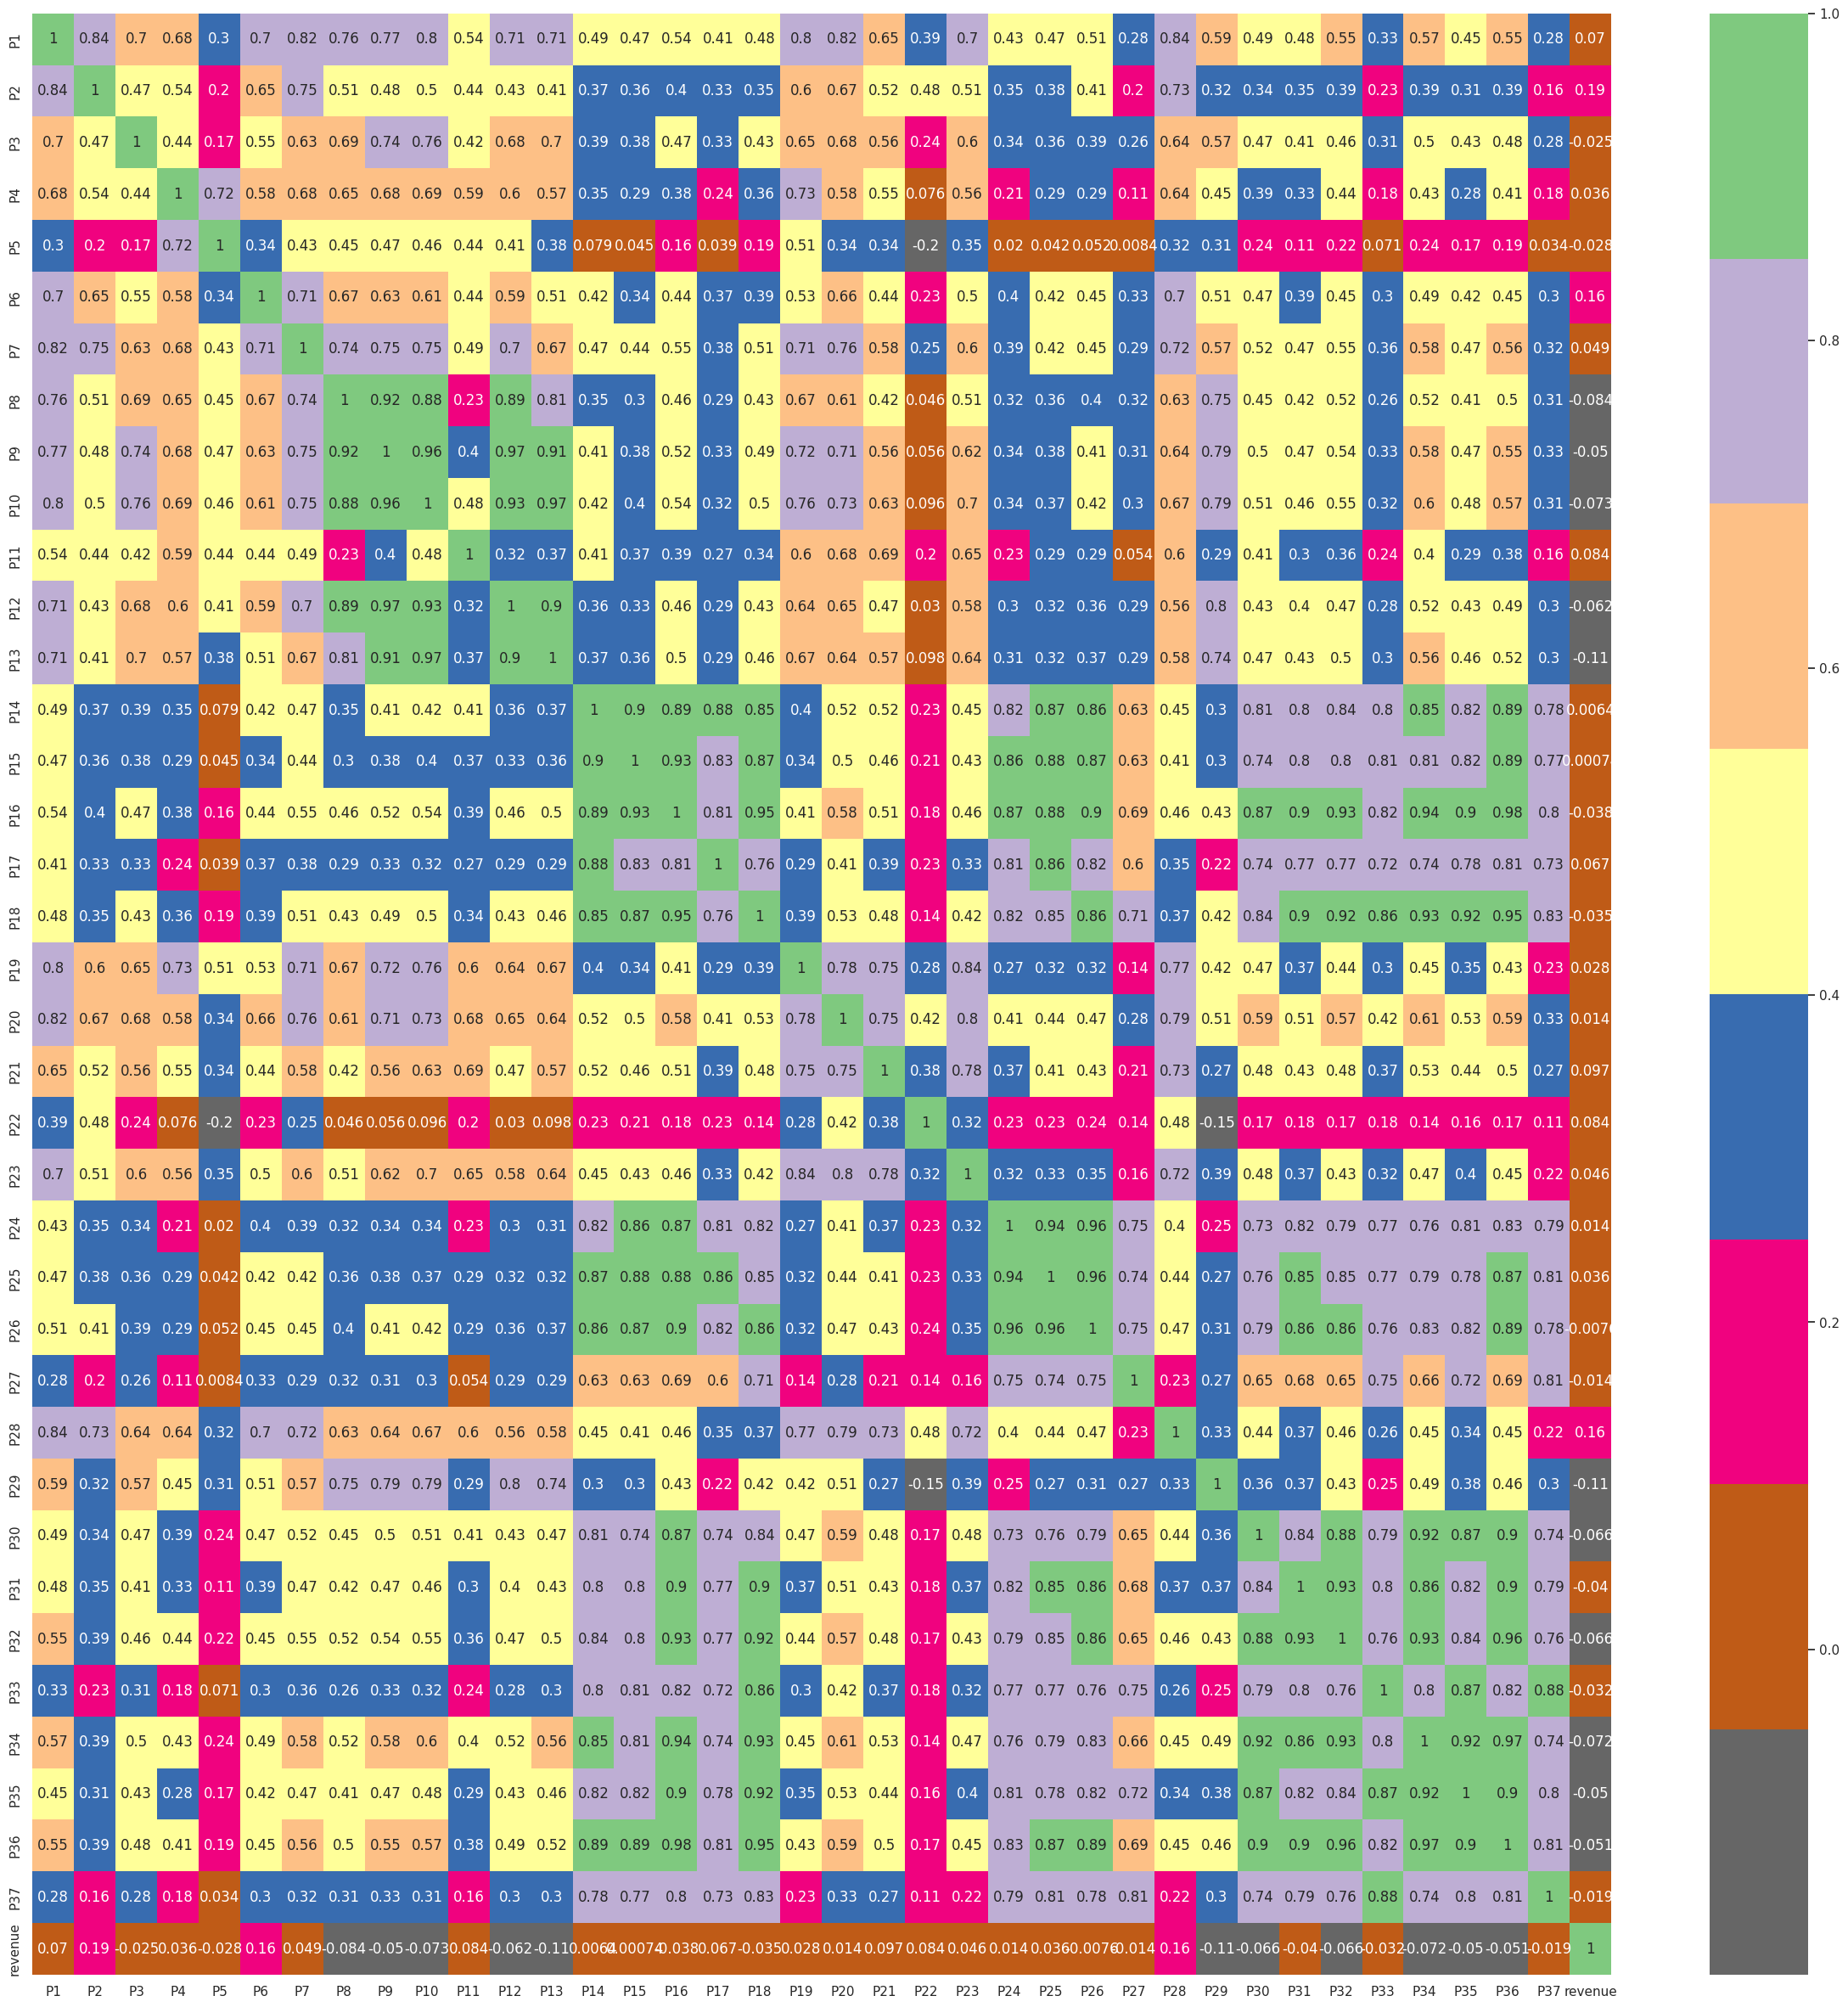

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True, cmap = 'Accent_r')

In [39]:
# Data Encoding
encoder = LabelEncoder()
for col in df.select_dtypes(include=['string']):
    df[col] = encoder.fit_transform(df[col])

## Feature Engineering

### splitting in input and target variables

In [40]:
x = df.drop('revenue',axis = 1)
y = df['revenue']

### Splitting data into train and test data

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### scaling data

In [42]:
scaler = StandardScaler()
scaler

StandardScaler()

In [43]:
# scaling train data
xs_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

# scaling test data
xs_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

### feature Selection

In [44]:
# Checking MI score

mi_score = mutual_info_regression(xs_train,y_train)
mi_score = pd.Series(mi_score)
mi_score.index = xs_train.columns
mi_score.sort_values(ascending= False)

City          0.094148
P22           0.086447
P21           0.060452
P36           0.060398
P25           0.058557
P28           0.056463
P17           0.030236
P18           0.022857
P24           0.017556
P23           0.016809
P26           0.014065
P4            0.011650
P11           0.011446
P5            0.008639
P3            0.008634
P8            0.007133
City Group    0.005090
P6            0.000567
P16           0.000000
P15           0.000000
Type          0.000000
P35           0.000000
P34           0.000000
P33           0.000000
P32           0.000000
P31           0.000000
P30           0.000000
P29           0.000000
P1            0.000000
P27           0.000000
P9            0.000000
P2            0.000000
P10           0.000000
P12           0.000000
P7            0.000000
P13           0.000000
P20           0.000000
P19           0.000000
P14           0.000000
P37           0.000000
dtype: float64

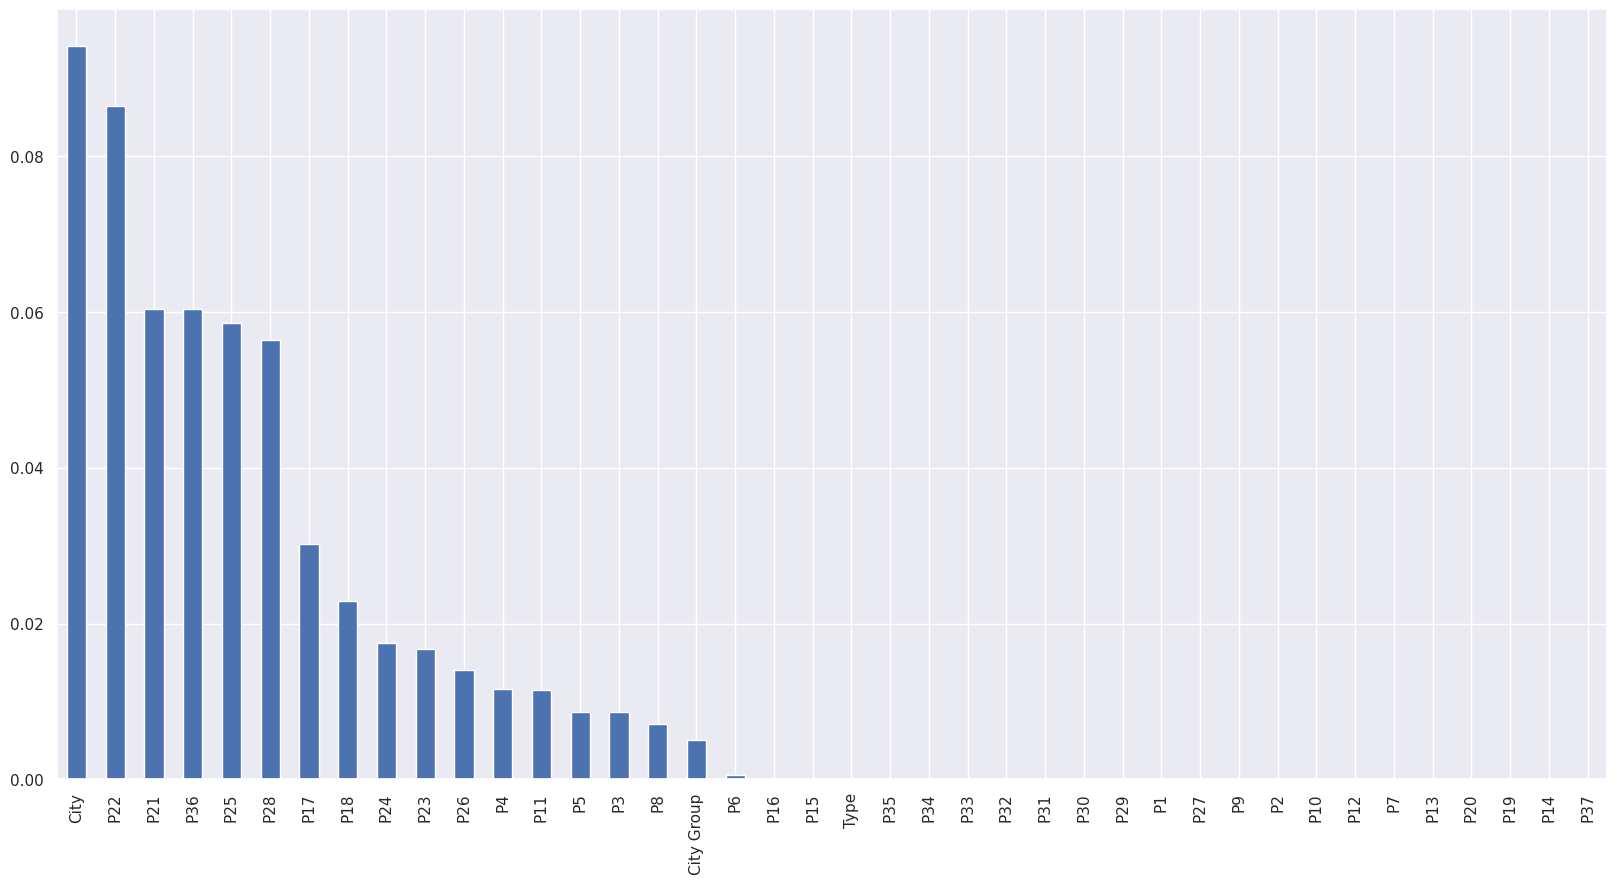

In [45]:
mi_score.sort_values(ascending = False).plot.bar(figsize = (20,10))
plt.show()

City and P22 is having the very high mi score. And there are many columns which are having 0 mi_scores.

In [74]:
best_cols = SelectKBest(mutual_info_regression,k = 15)
best_cols.fit(xs_train,y_train)

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x7cd169134820>)

In [47]:
best_feat = xs_train.columns[best_cols.get_support()]
best_feat

Index(['City', 'City Group', 'P4', 'P5', 'P8', 'P11', 'P17', 'P18', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P28', 'P36'],
      dtype='object')

In [48]:
xs_train = xs_train[best_feat]
xs_test = xs_test[best_feat]

In [49]:
xs_train.head()

,City,City Group,P4,P5,P8,P11,P17,P18,P21,P22,P23,P24,P25,P28,P36
0,-0.138580,1.127312,1.570423,1.633056,1.551644,2.485922,-0.591774,-0.602592,6.142703,0.621170,3.891029,-0.610160,-0.585063,2.737262,-0.557792
1,0.290546,1.127312,-0.425800,0.007457,-0.074598,-0.658745,-0.591774,-0.602592,-0.615599,-1.010336,-0.556168,-0.610160,-0.585063,-0.532454,-0.557792
2,-0.310230,1.127312,-0.425800,0.007457,-0.616679,0.389477,-0.591774,-0.602592,-0.132863,-1.010336,-0.322105,-0.610160,-0.585063,-0.941168,-0.557792
3,0.891321,-0.887066,-0.425800,0.007457,-0.074598,-0.658745,0.581015,0.660534,-0.615599,-1.010336,-0.088042,1.683200,0.396043,-0.123739,0.495010
4,-0.653531,1.127312,-0.425800,0.007457,-0.616679,-0.134634,-0.005380,0.344752,0.832609,2.252676,0.380084,0.765856,0.886596,0.284975,0.231810


Now we have got our 15 best features.
___

Before going into model building part Let's apply pca to capture only the important data.

## PCA

In [50]:
pca = PCA(0.95)
x_train_pca = pca.fit_transform(xs_train)
x_test_pca = pca.transform(xs_test)

In [51]:
# Converting to dataframe
component_names = [f"PC{i+1}" for i in range(x_train_pca.shape[1])]
x_train_pca = pd.DataFrame(x_train_pca,columns = component_names)
x_test_pca = pd.DataFrame(x_test_pca,columns = component_names)
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4.527983,5.635710,-1.936086,2.901520,-1.221408,-1.842085,1.033523,0.114152,1.979769
1,-1.980739,0.300063,0.724680,-0.241750,-0.763249,-0.655745,-0.196337,0.041302,-0.059092
2,-1.787390,0.586589,0.835365,0.652133,0.150410,-1.009594,0.113249,-0.128978,-0.211421
3,0.609825,-1.763971,0.501462,-1.518839,0.087365,-0.408018,0.273883,0.661038,0.311456
4,1.037571,-0.687006,-0.334376,2.193129,-0.401156,0.859855,-1.265284,-0.144900,0.340269
...,...,...,...,...,...,...,...,...,...
104,7.038517,-1.649419,0.434655,-1.573587,-1.238292,0.789177,0.022388,-0.843391,-0.426030
105,0.220203,3.408889,1.615200,0.097020,0.194098,-0.199994,-0.159192,0.095442,-0.752288
106,-1.842203,0.126589,0.247962,1.191457,-0.728531,0.943375,-0.159475,-0.097956,-0.435548
107,3.616623,4.008805,-3.227978,0.801735,-1.120393,-1.101000,2.007340,1.218721,-0.346191


In [52]:
# This loadings DataFrame provides valuable insights into how each original feature contributes to the principal components. Positive loadings indicate a positive correlation with the principal component, while negative loadings indicate a negative correlation. Higher absolute values of loadings indicate a stronger influence of the feature on the principal component.
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=xs_train.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
City,0.041162,-0.192127,-0.435592,-0.440085,-0.286761,-0.604270,-0.259015,-0.165286,0.115374
City Group,-0.107691,0.103658,0.420494,0.484402,-0.523011,-0.301299,-0.392673,-0.077671,-0.170445
P4,0.250256,0.381794,0.031230,-0.241563,0.080575,0.060917,-0.192364,-0.130031,-0.245936
P5,0.139536,0.413955,0.282174,-0.217606,0.296647,-0.021170,-0.515572,0.185878,0.398077
P8,0.236291,0.267120,0.098152,-0.346043,-0.509899,0.265843,0.121496,-0.045241,-0.132957
P11,0.253251,0.231474,-0.116765,0.224361,0.439106,-0.395851,0.059880,-0.191644,-0.503081
P17,0.292332,-0.307779,0.097180,0.087093,0.109902,-0.132256,-0.100255,0.366526,0.108972
P18,0.315419,-0.213104,0.279780,-0.036023,0.028726,0.065873,0.116668,-0.440253,0.222193
P21,0.297015,0.186339,-0.136205,0.300397,-0.021397,-0.195408,0.179744,-0.219246,0.534026
P22,0.146589,-0.093959,-0.502397,0.365241,-0.039451,0.476558,-0.500368,-0.189235,0.042725


## Model Building

### 1. Linear Regression

In [53]:
param_grid = {
    'fit_intercept': [True,False],
    'copy_X':[True,False],
    'positive' : [True,False]
}

In [54]:
lr = GridSearchCV(LinearRegression(), param_grid, cv=5,n_jobs= -1)
lr.fit(x_train_pca,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [55]:
print('Best parameters:', lr.best_params_)
lr_pred = lr.predict(x_test_pca)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [56]:
print('r2_score :', r2_score(y_test,lr_pred))
print('MSE :', mean_squared_error(y_test,lr_pred))
print('MAE :', mean_absolute_error(y_test,lr_pred))

r2_score : 0.04865587272433103
MSE : 11638684957674.51
MAE : 2101579.38687544


### 2. Random Forest

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

In [58]:
rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,n_jobs = -1)
rf.fit(x_train_pca,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [59]:
print('Best parameters:', rf.best_params_)
rf_pred = rf.predict(x_test_pca)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [60]:
print('r2_score :', r2_score(y_test,rf_pred))
print('MSE :', mean_squared_error(y_test,rf_pred))
print('MAE :', mean_absolute_error(y_test,rf_pred))

r2_score : 0.10286491876195025
MSE : 10975494855797.627
MAE : 2028585.884250832


### 3. AdaBoost Regressor

In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of estimators (weak learners) in the ensemble
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate shrinks the contribution of each estimator
}

In [62]:
# Creating the base estimator (weak learner), in this case, a Decision Tree Regressor
base_estimator = DecisionTreeRegressor()

# Creating the AdaBoostRegressor model
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator)

In [63]:
ad = GridSearchCV(adaboost_model, param_grid, cv=5,n_jobs = -1)
ad.fit(x_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [64]:
print('Best parameters:', ad.best_params_)
ad_pred = ad.predict(x_test_pca)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [65]:
print('r2_score :', r2_score(y_test,ad_pred))
print('MSE :', mean_squared_error(y_test,ad_pred))
print('MAE :', mean_absolute_error(y_test,ad_pred))

r2_score : 0.11032255035340455
MSE : 10884258654159.535
MAE : 1906979.8214285714


### 4. GradientBoosting Regressor

In [66]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

In [67]:
gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, cv=5,n_jobs = -1)
gb.fit(x_train_pca,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]})

In [68]:
print('Best parameters:', gb.best_params_)
gb_pred = gb.predict(x_test_pca)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [69]:
print('r2_score :', r2_score(y_test,gb_pred))
print('MSE :', mean_squared_error(y_test,gb_pred))
print('MAE :', mean_absolute_error(y_test,gb_pred))

r2_score : 0.00916879444617813
MSE : 12121767420478.512
MAE : 2015273.040886642


### 5. XGBoost regressor

In [70]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],     # Step size shrinkage used to prevent overfitting
    'n_estimators': [50, 100, 200],        # Number of boosting stages to be run
    'max_depth': [3, 5, 7],                # Maximum depth of a tree
    'subsample': [0.8, 1.0],               # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],        # Subsample ratio of columns when constructing each tree
}

In [71]:
xg = GridSearchCV(XGBRegressor(), param_grid, cv=5,n_jobs = -1)
xg.fit(x_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [72]:
print('Best parameters:', xg.best_params_)
xg_pred = xg.predict(x_test_pca)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [73]:
print('r2_score :', r2_score(y_test,xg_pred))
print('MSE :', mean_squared_error(y_test,xg_pred))
print('MAE :', mean_absolute_error(y_test,xg_pred))

r2_score : 0.1426253817628882
MSE : 10489067821277.135
MAE : 1939658.7142857143


## Conclusion

After building five models. Two models ___RandomForestRegressor___ and ___AdaBoostRegressor___ are giving us higher accuracy then others.

Based on __r2_score__, __mean_squared_error__ and __mean_absolute_error__, ___AdaBoostRegressor model___ is giving us good resuts.

__Best model__ : ___AdaBoostRegressor___